# Problem Statement:
Description:

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Importing Dataset:

In [3]:
df=pd.read_csv("global_power_plant.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis:

In [3]:
df.shape

(907, 27)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [5]:
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

We can observe that 'country' , 'country long' ,'other_fuel2','year_of_capacity_data' & 'generation_data_source' columns contains only one unique element,so we can drop those columns.

In [4]:
df=df.drop(['country','country_long','other_fuel2','year_of_capacity_data','generation_data_source'],axis=1)

In [5]:
df.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel3,commissioning_year,owner,...,geolocation_source,wepp_id,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,2011.0,Solar Paces,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,Ultratech Cement ltd,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,AES,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,2004.0,NaN,...,WRI,NaN,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,NaN
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,2015.0,NaN,...,WRI,NaN,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,NaN


In [8]:
df.nunique()

name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
estimated_generation_gwh      0
dtype: int64

In [9]:
df.isnull().sum()


name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
estimated_generation_gwh    907
dtype: int64

We can see  many columns containing heavy missing data.Let's drop the columns which are not useful.

In [6]:
df.drop(['other_fuel1','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'],axis=1,inplace=True)

In [11]:
df.isnull().sum()

name                     0
gppd_idnr                0
capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
owner                  565
source                   0
url                      0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [25]:
df.dtypes

name                    object
gppd_idnr               object
capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
commissioning_year     float64
owner                   object
source                  object
url                     object
geolocation_source      object
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

In [ ]:
df.describe

# Data Cleaning:

In [7]:
df["latitude"]=df["latitude"].fillna(np.mean(df["latitude"]))
df["longitude"]=df["longitude"].fillna(np.mean(df["longitude"]))

In [13]:
df.head(2)

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN


In [14]:
df.isnull().sum()

name                     0
gppd_idnr                0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year     380
owner                  565
source                   0
url                      0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [8]:
df["generation_gwh_2014"]=df["generation_gwh_2014"].fillna(np.mean(df["generation_gwh_2014"]))
df["generation_gwh_2015"]=df["generation_gwh_2015"].fillna(np.mean(df["generation_gwh_2015"]))
df["generation_gwh_2016"]=df["generation_gwh_2016"].fillna(np.mean(df["generation_gwh_2016"]))
df["generation_gwh_2017"]=df["generation_gwh_2017"].fillna(np.mean(df["generation_gwh_2017"]))
df["generation_gwh_2018"]=df["generation_gwh_2018"].fillna(np.mean(df["generation_gwh_2018"]))

In [16]:
df.isnull().sum()

name                     0
gppd_idnr                0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year     380
owner                  565
source                   0
url                      0
geolocation_source      19
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

In [9]:
from sklearn.impute import SimpleImputer
emb=SimpleImputer(strategy="most_frequent")
df['owner']=emb.fit_transform(df['owner'].values.reshape(-1, 1))
df['commissioning_year']=emb.fit_transform(df['commissioning_year'].values.reshape(-1, 1))
df['geolocation_source']=emb.fit_transform(df['geolocation_source'].values.reshape(-1, 1))

In [18]:
df.isnull().sum()

name                   0
gppd_idnr              0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
owner                  0
source                 0
url                    0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

<AxesSubplot:>

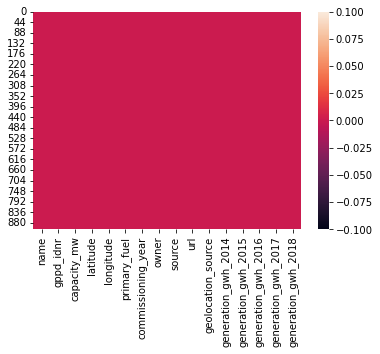

In [21]:
sns.heatmap(df.isnull())

# Data Visualisation:

Univariate Analysis:

In [26]:
df.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,2015.0,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,2015.0,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

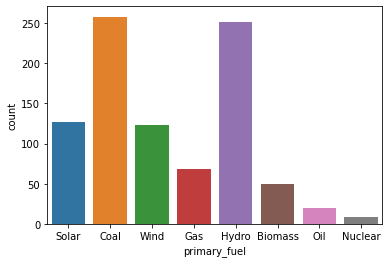

In [27]:
sns.countplot(df['primary_fuel'])

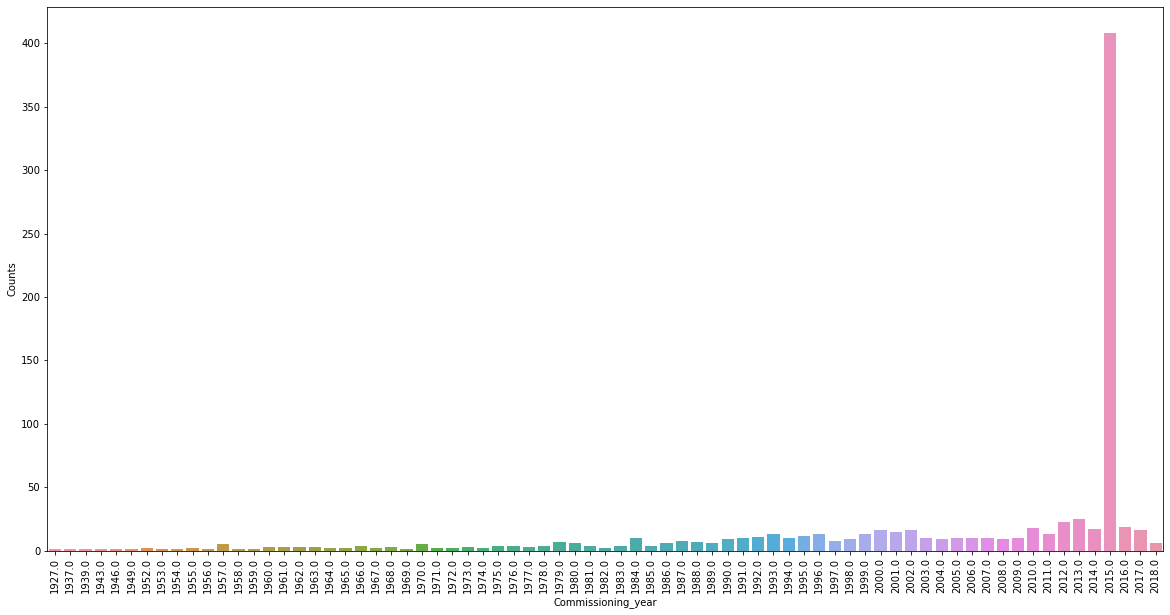

In [40]:
plt.figure(figsize=(20,10))
sns.countplot(df['commissioning_year'])
plt.xlabel('Commissioning_year', fontsize= 10)
plt.ylabel('Counts', fontsize= 10)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='latitude', ylabel='Density'>

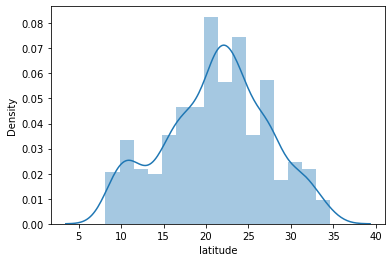

In [42]:
sns.distplot(df["latitude"])

<AxesSubplot:xlabel='longitude', ylabel='Density'>

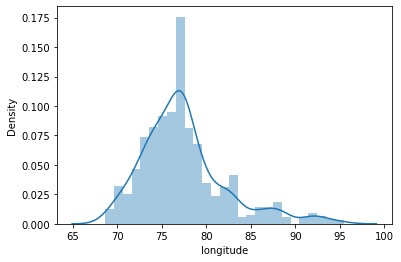

In [43]:
sns.distplot(df["longitude"])

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

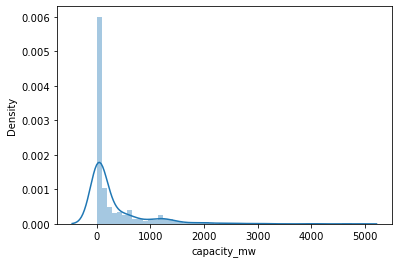

In [44]:
sns.distplot(df["capacity_mw"])

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

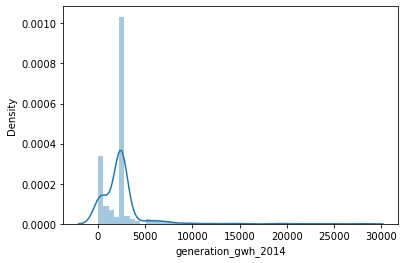

In [51]:
sns.distplot(df["generation_gwh_2014"])

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Density'>

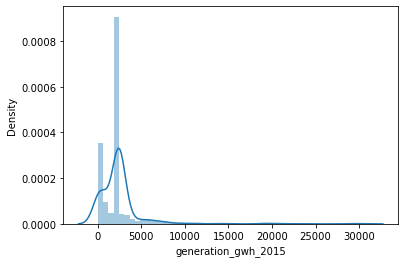

In [52]:
sns.distplot(df["generation_gwh_2015"])

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Density'>

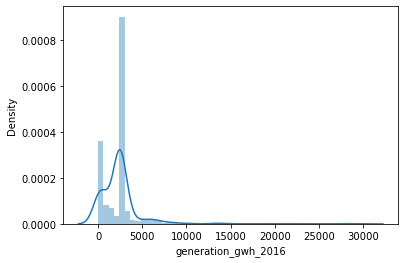

In [53]:
sns.distplot(df["generation_gwh_2016"])

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Density'>

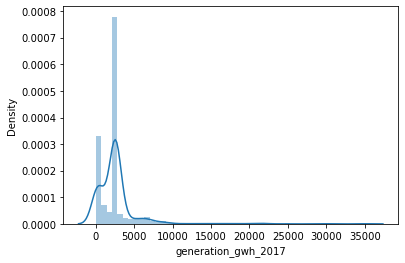

In [54]:
sns.distplot(df["generation_gwh_2017"])

<AxesSubplot:xlabel='generation_gwh_2018', ylabel='Density'>

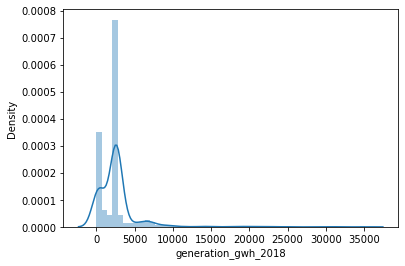

In [55]:
sns.distplot(df["generation_gwh_2018"])

Bivariate Analysis:

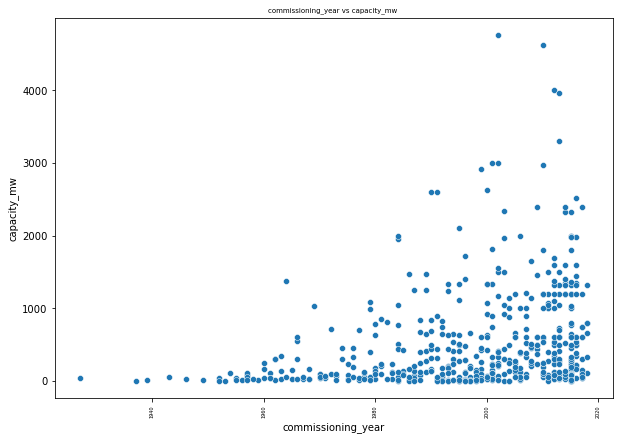

In [69]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x='commissioning_year',y='capacity_mw')
plt.title('commissioning_year vs capacity_mw ', fontsize=7)
plt.xticks(rotation=90,fontsize=5)
plt.show()

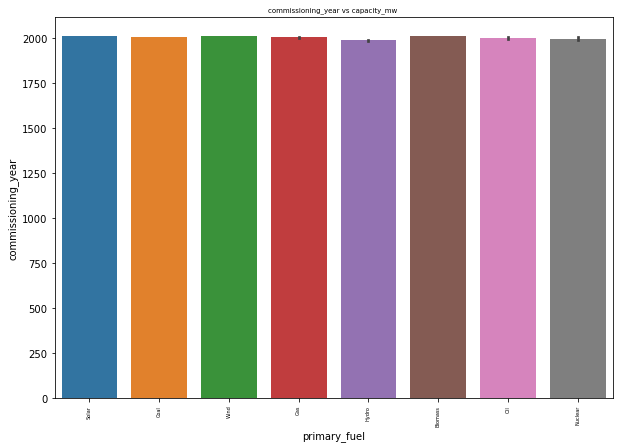

In [73]:
plt.figure(figsize=(10,7))
sns.barplot(data=df, x='primary_fuel',y='commissioning_year')
plt.title('commissioning_year vs capacity_mw ', fontsize=7)
plt.xticks(rotation=90,fontsize=5)
plt.show()

<Figure size 720x504 with 0 Axes>

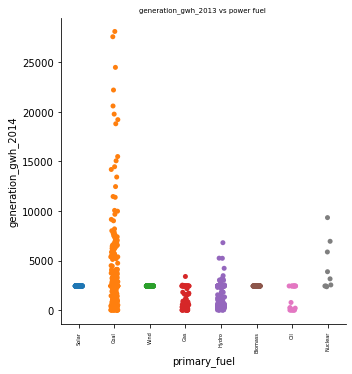

In [81]:
plt.figure(figsize=(10,7))
sns.catplot(data=df, x='primary_fuel',y='generation_gwh_2014')
plt.title('generation_gwh_2013 vs power fuel ', fontsize=7)
plt.xticks(rotation=90,fontsize=5)
plt.show()

# Multivariate Analysis:

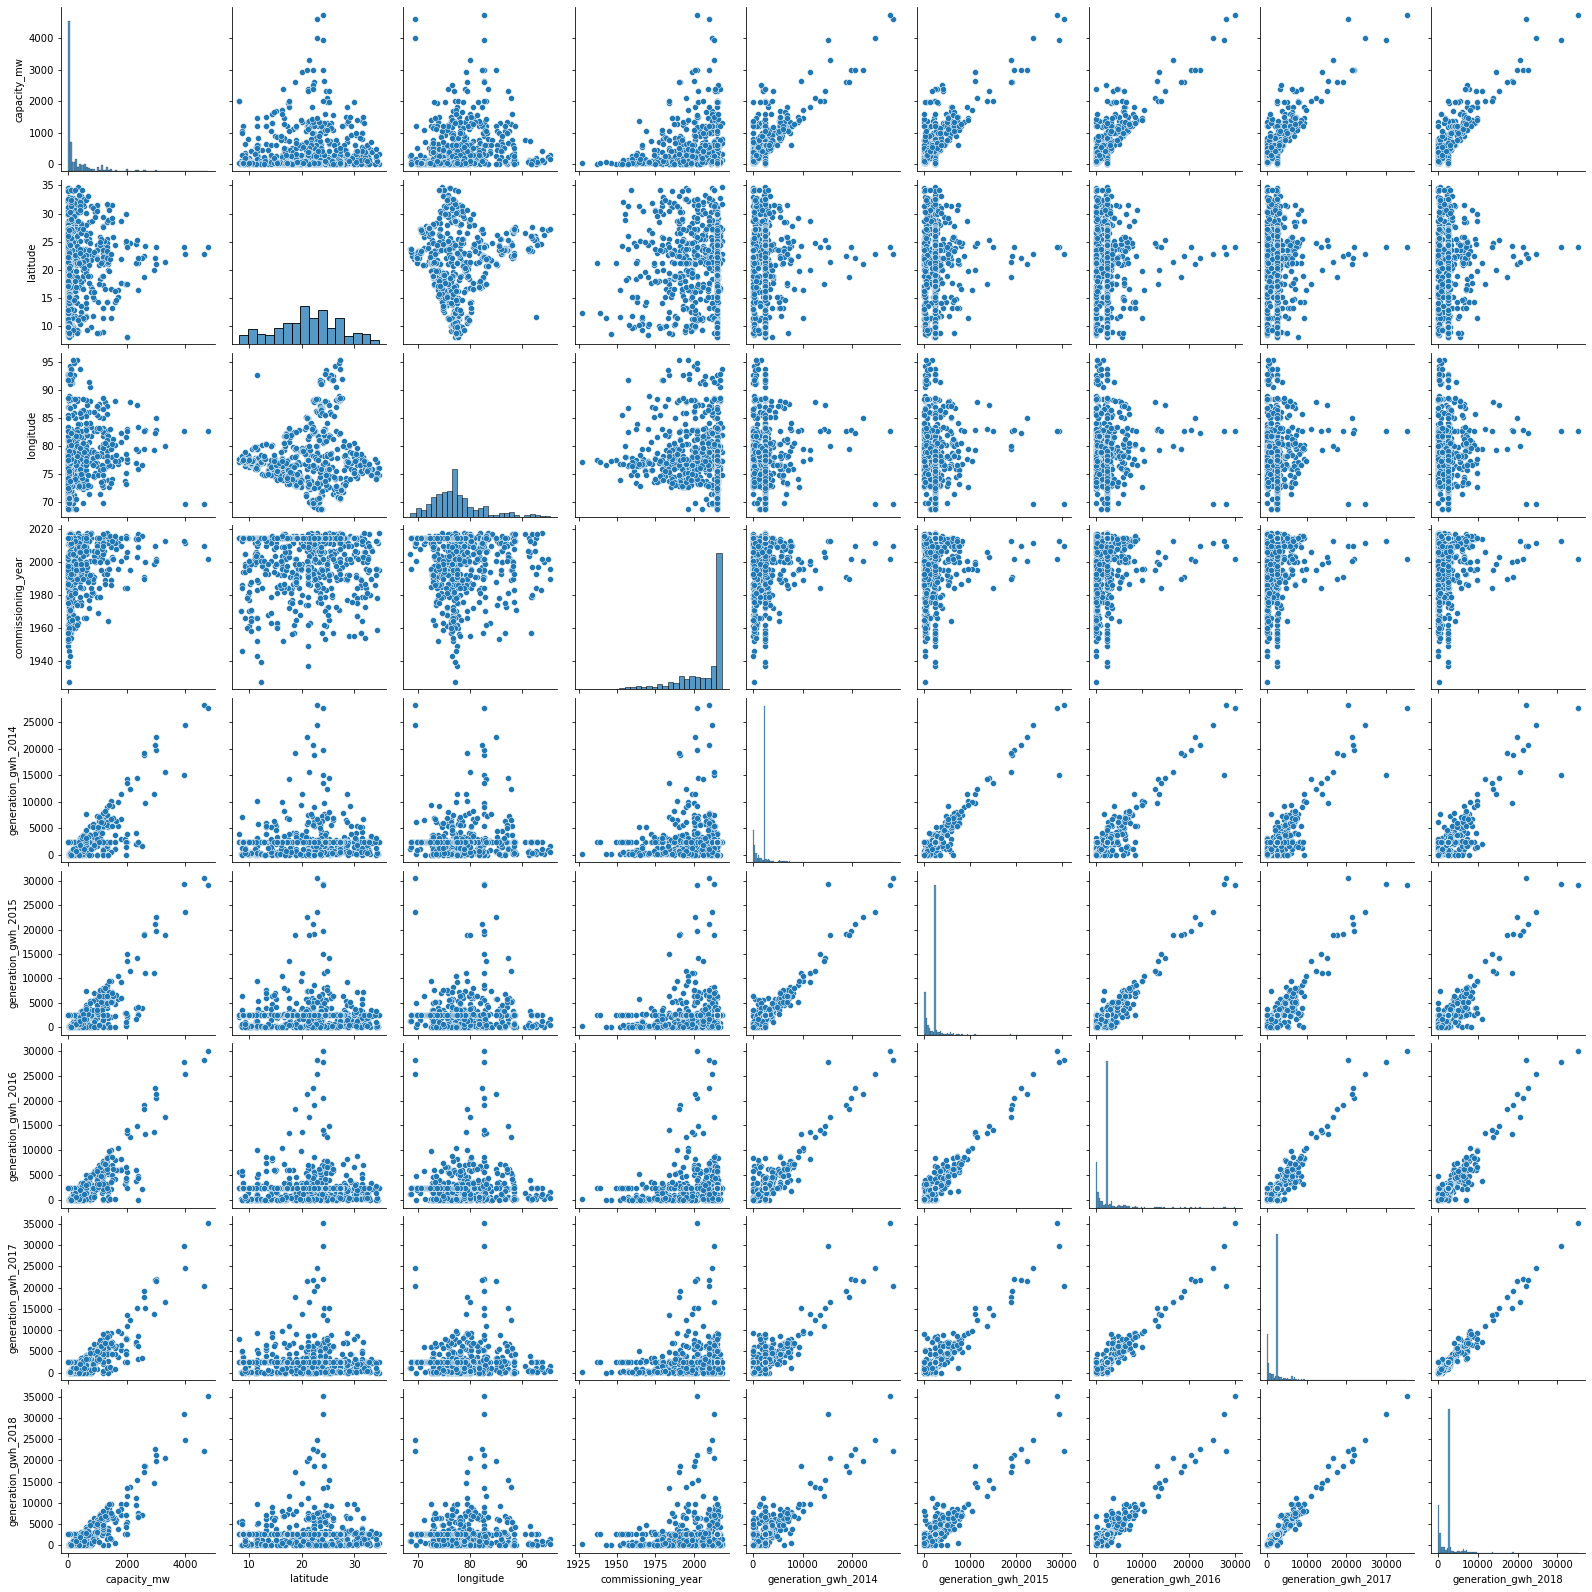

In [82]:
sns.pairplot(df)

Let's Drop irrelevant columns

In [10]:
df.drop(['name','gppd_idnr','owner','commissioning_year','geolocation_source','url'], axis=1, inplace= True)

In [11]:
df.drop(['source'],axis=1,inplace=True)

In [92]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,Coal,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,Wind,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,Gas,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


# Outliers Check:

<AxesSubplot:>

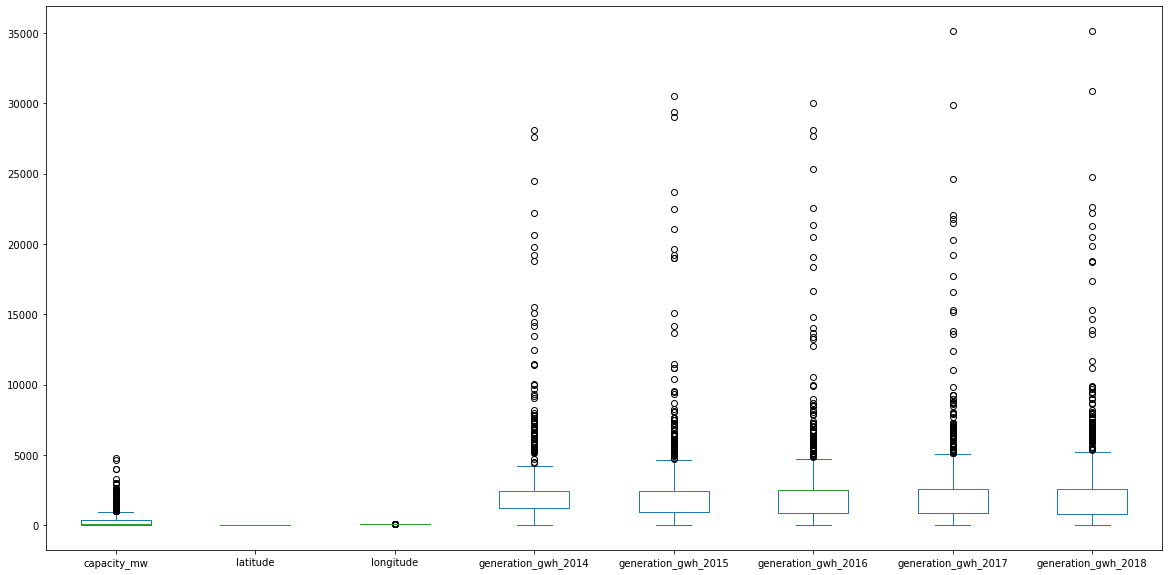

In [12]:
df.plot(kind='box',fontsize=10,figsize=(20,10))

# Removing Outliers:

In [13]:
cols=df[['capacity_mw','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]

In [14]:
from scipy.stats import zscore
z=np.abs(zscore(cols))
df_new=df[(z<3).all(axis=1)]
df_new

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,Coal,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,Wind,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,Gas,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,2431.823590,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,25.5,15.2758,75.5811,Wind,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,80.0,24.3500,73.7477,Coal,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [15]:
df.shape

(907, 9)

In [16]:
df_new.shape

(884, 9)

# Percentage of Loss:

In [17]:
loss=((907-884)/907)*100
loss

2.535832414553473

# Skewness:

In [18]:
df_new.skew()

capacity_mw            2.040041
latitude              -0.135991
longitude              1.201208
generation_gwh_2014    1.508578
generation_gwh_2015    1.385508
generation_gwh_2016    1.411148
generation_gwh_2017    1.279383
generation_gwh_2018    1.317201
dtype: float64

In [19]:
sk=['capacity_mw','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']

In [20]:
from sklearn.preprocessing import PowerTransformer
Scaler=PowerTransformer(method='yeo-johnson')

In [21]:
df_new[sk] = Scaler.fit_transform(df_new[sk].values)

# Encoding:

In [22]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df['primary_fuel']=enc.fit_transform(df['primary_fuel'])

# Correlation:

In [23]:
df_new.corr()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.055085,0.296847,-0.003408,-0.026939,-0.005955,-0.007021,-0.020785
latitude,0.055085,1.000000,0.032296,0.046450,0.036043,0.041829,0.021278,0.025383
longitude,0.296847,0.032296,1.000000,-0.141080,-0.150505,-0.111441,-0.132220,-0.133933
generation_gwh_2014,-0.003408,0.046450,-0.141080,1.000000,0.871898,0.820381,0.757432,0.769747
generation_gwh_2015,-0.026939,0.036043,-0.150505,0.871898,1.000000,0.909972,0.810005,0.818771
generation_gwh_2016,-0.005955,0.041829,-0.111441,0.820381,0.909972,1.000000,0.904204,0.908870
generation_gwh_2017,-0.007021,0.021278,-0.132220,0.757432,0.810005,0.904204,1.000000,0.951111
generation_gwh_2018,-0.020785,0.025383,-0.133933,0.769747,0.818771,0.908870,0.951111,1.000000


<AxesSubplot:>

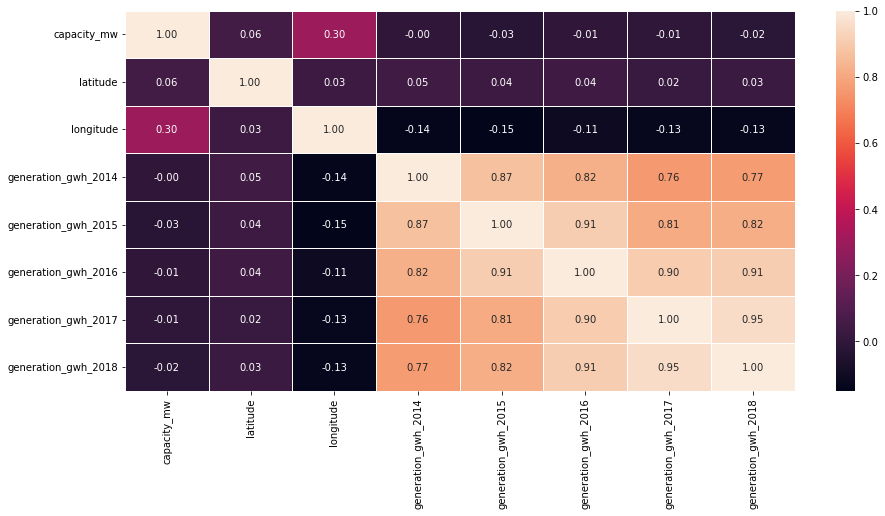

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df_new.corr(),annot=True,linewidth=0.5,fmt='.2f')

# Seperating the columns into features and target as X and Y:

In [29]:
x=df_new.drop('primary_fuel',axis=1)
y=df_new['primary_fuel']

# Scaling:

In [30]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
x=pd.DataFrame(Scaler.fit_transform(x),columns=x.columns)
x

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.689394,1.143567,-0.865523,0.356710,0.383316,0.386313,0.388954,0.405331
1,0.242377,0.586670,-0.580046,0.356710,0.383316,0.386313,0.388954,0.405331
2,-0.260103,0.120226,-1.672425,0.356710,0.383316,0.386313,0.388954,0.405331
3,0.416289,0.440814,2.914864,-1.007178,-0.699566,-0.652244,-0.870367,-0.889268
4,1.772887,0.129433,1.047339,0.691112,1.906185,1.942740,1.576315,2.122732
...,...,...,...,...,...,...,...,...
879,1.713273,-0.793743,-0.006755,0.356710,-2.084748,-1.391997,-0.686104,-0.830792
880,-1.608549,-1.348050,0.161948,0.356710,0.383316,0.386313,0.388954,0.405331
881,-0.496946,-0.959805,-0.377231,0.356710,0.383316,0.386313,0.388954,0.405331
882,0.131637,0.518834,-0.759745,0.356710,0.383316,0.386313,0.388954,0.405331


# VIF:

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,1.104849,capacity_mw
1,1.007723,latitude
2,1.134757,longitude
3,4.358847,generation_gwh_2014
4,8.310305,generation_gwh_2015
5,12.027190,generation_gwh_2016
6,11.665529,generation_gwh_2017
7,12.290599,generation_gwh_2018


Here we can observe that 'generation_gwh_2018' has high vif,so lets drop it. 

In [32]:
x.drop('generation_gwh_2018',axis=1,inplace=True)

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,1.102659,capacity_mw
1,1.007714,latitude
2,1.134325,longitude
3,4.322362,generation_gwh_2014
4,8.291501,generation_gwh_2015
5,11.158158,generation_gwh_2016
6,5.639155,generation_gwh_2017


Here we can observe that 'generation_gwh_2016' has high vif,so lets drop it.

In [34]:
x.drop('generation_gwh_2016',axis=1,inplace=True)

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,1.102629,capacity_mw
1,1.006235,latitude
2,1.124023,longitude
3,4.321415,generation_gwh_2014
4,5.358258,generation_gwh_2015
5,3.006805,generation_gwh_2017


# Finding Best Random State:

In [127]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state =i)
    RFC = RandomForestClassifier()
    RFC.fit(x_train, y_train)
    pred = RFC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.7853107344632768  on Random_state  53


In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=53)

# Decision Tree Classifier:

In [44]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy_Score is  ',acc)
print('Confusion Matrix is ' ,'\n',confusion_matrix(y_test,pred))
print('Classification Report is ','\n',classification_report(y_test,pred))

Accuracy_Score is   0.6892655367231638
Confusion Matrix is  
 [[ 5  0  0  1  0  0  1  0]
 [ 0 32  3  4  0  1  1  0]
 [ 1  2  4  5  1  1  0  1]
 [ 0  4  5 41  0  0  0  2]
 [ 0  2  1  0  0  0  0  0]
 [ 0  1  2  0  0  2  0  0]
 [ 1  1  0  2  0  0 23  6]
 [ 0  1  0  3  0  0  2 15]]
Classification Report is  
               precision    recall  f1-score   support

     Biomass       0.71      0.71      0.71         7
        Coal       0.74      0.78      0.76        41
         Gas       0.27      0.27      0.27        15
       Hydro       0.73      0.79      0.76        52
     Nuclear       0.00      0.00      0.00         3
         Oil       0.50      0.40      0.44         5
       Solar       0.85      0.70      0.77        33
        Wind       0.62      0.71      0.67        21

    accuracy                           0.69       177
   macro avg       0.55      0.55      0.55       177
weighted avg       0.69      0.69      0.68       177



# Random Forest Classifier:

In [45]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy_Score is ',acc)
print('Confusion_Matrix is ',confusion_matrix(y_test,pred))
print('Classification_Report is ','\n',classification_report(y_test,pred))

Accuracy_Score is  0.768361581920904
Confusion_Matrix is  [[ 5  0  0  1  0  0  1  0]
 [ 0 35  1  3  0  1  0  1]
 [ 1  2  4  6  0  1  0  1]
 [ 0  4  0 46  0  0  0  2]
 [ 0  3  0  0  0  0  0  0]
 [ 0  1  1  0  0  3  0  0]
 [ 1  1  0  1  0  0 26  4]
 [ 0  0  0  3  0  0  1 17]]
Classification_Report is  
               precision    recall  f1-score   support

     Biomass       0.71      0.71      0.71         7
        Coal       0.76      0.85      0.80        41
         Gas       0.67      0.27      0.38        15
       Hydro       0.77      0.88      0.82        52
     Nuclear       0.00      0.00      0.00         3
         Oil       0.60      0.60      0.60         5
       Solar       0.93      0.79      0.85        33
        Wind       0.68      0.81      0.74        21

    accuracy                           0.77       177
   macro avg       0.64      0.61      0.61       177
weighted avg       0.76      0.77      0.75       177



In [ ]:
from sklearn.model_selection import GridSearchCV
parameters={'max_features':['auto','sqrt','log2'],'max_depth':[10,15,20,25],'criterion':['gini','entropy'],'n_estimators':[100,200,300,400]}
GCV=GridSearchCV(rfc,parameters,cv=5,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

# Saving the Model:

In [ ]:
import pickle
filename='Global_Power_Plant.pkl'
pickle.dump(rfc, open(filename,'wb'))